# Exercises Week 5

This week is about two topics. Decision trees and clustering. The main exercise will be on decision trees, and we'll also talk a bit about unbalanced data sets as well as a little exercise on clustering, an example of unsupervised learning.  

## Part 1: Decision trees (DSFS Chapter 17)

> _Reading I_: The visual introduction to decision trees on [**this webpage**](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
) is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat!

---

> _Reading II_: DSFS Chapter 17. Work through chapter 17 of the book. It's not as flashy as the fancy `D3.js` based web-explanation above, but it's very good (in my humble opinion).

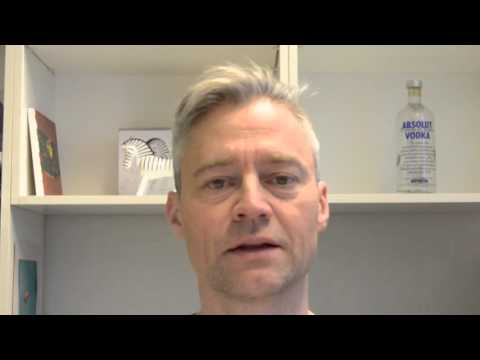

In [1]:
# Ole explains decision trees
from IPython.display import YouTubeVideo
YouTubeVideo("LAA_CnkAEx8",width=600, height=338)

> _Exercises_: Just a few questions to make sure you've read the text and/or watched the video.
>
> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?
> * Explain in your own words: Why is _entropy_ useful when deciding where to split the data?
> * Why are trees prone to [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg)?
> * Explain (in your own words) how random forests help prevent overfitting.

* Decision trees and decision trees for regression (?)
* If we split the data between two sets in order to recognize a pattern, we want to separate the data as much as possible: separating the data on a set of length 2 and the other of length 298 is not very useful because most of the separated data will go the bucket 2 and you'll have to subsenquently separate it more
* Because we usually want to obtain sets with low entropy, and this very much fosters very specific decisiion 
* Random forests build lots of different trees with a subset of the data, so you can use the rest of the data to test them and validate that they don't overfit

Chief Suneman arrives at work one day and immediately starts motivating the team by randomly yelling at everyone in order to increase morale - something like [this](https://www.youtube.com/watch?v=L_QCioSGgwU). After a while, the team gets him calmed down with a cup of coffee and a movie. It doesn't help, after watching the first 10 minutes (see below) he comes out of his office with an outrageous request for the newly appointed data science team

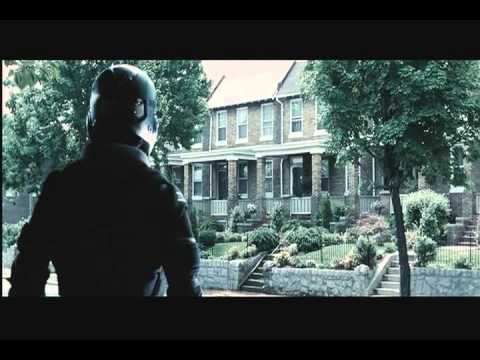

In [2]:
YouTubeVideo("BmSarhudhiY",width=600, height=300)

The chief wants you to start from real data and build a system that replicates the functionality in the _Minority Report_ system. Imagine, we find out that certain type of crime is going to take place - as well as the exact time of the crime - **but that we don't know _where_**, then Suneman wants an algorithm that will predict which district the crime is most likely to take place in. Specifically, let's build an algorithm that predicts the location of a crime based on its type and time.

The friendly leader of the data-science team, Captain Mones, helps break down the task.

> _Exercise_: Building the _minority report_ algorithm
>
> * Use the category of the crimes (e.g. `ASSAULT`, `LARCENY/THEFT`, ...) to build a decision tree that predicts the corresponding district (e.g. `TENDERLOIN`, `MISSION`, etc). I recommend useing the [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/tree.html) class in scikit-learn (but you can also try the ID3 tree in the DSFS book - note, though, that this one only does binary classification). For training, use 90% of the data and test the tree prediction on the remaining 10%. 
 * **Hint**: The scikit-learn fit function needs a list of lists as input (even if your nested lists have length 1). 
>  - What is the fraction of correct predictions? 
>  - What are the correct predictions if you restrict the training/prediction to single districts (for example, predicting Mission vs. all other districts, etc)? 
>   - Compare it to the random guess, what would you get if you'd guess a district randomly? 
>   - And if you'd guess always one of the districts (for example the district with the most crimes)?

In [3]:
import pandas
SFPD_data = pandas.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")

In [4]:
import numpy
from sklearn import tree, preprocessing, model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(SFPD_data["Category"], SFPD_data["PdDistrict"], \
                                                                    test_size=0.1)

In [5]:
le1 = preprocessing.LabelEncoder()
le1.fit_transform(numpy.array([X_train,Y_train]).flatten())
X_train = le1.transform(X_train)
Y_train = le1.transform(Y_train)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train.reshape(-1,1), Y_train)

X_test = le1.transform(X_test)
Y_test = le1.transform(Y_test)
districts_predicted = clf.predict(X_test.reshape(-1,1))

/usr/lib/python2.7/site-packages/numpy/lib/arraysetops.py:275: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


In [6]:
from __future__ import division

success_percentage = numpy.mean(districts_predicted == Y_test)*100
print "There is " + str(success_percentage) + " percent of correct guesses."

There is 20.1906284226 percent of correct guesses.


In [7]:
import random

hash_list = numpy.unique(Y_train)

random_districts = [random.choice(hash_list) for i in Y_test]
success_percentage_rand = numpy.mean(random_districts == Y_test)*100
print "Guessing randomly would wield a " + str(success_percentage_rand) + " percentage of correct guesses."

Guessing randomly would wield a 9.07655724279 percentage of correct guesses.


In [8]:
most_crimes_indice = numpy.argmax(numpy.bincount(Y_train))
most_crimes_districts = [most_crimes_indice for i in Y_test]
success_percentage_most_crimes = numpy.mean(most_crimes_districts == Y_test)*100
print "Always using the district with the most crimes, we obtain " + str(success_percentage_most_crimes) + " percent of correct guesses."

Always using the district with the most crimes, we obtain 18.0697392179 percent of correct guesses.


> * Now, add the day of the week to the features, do any of the the performance measures improve? 
> * ***OPTIONAL***: Visualize the tree so that you can see what it actually does! For visualization, you can use the export_graphviz method of `scikit-learn` and then convert the `.dot` file to a PDF. 
>   - **Note**: [in order to use GraphViz in IPython, you need to install it on your system first](http://www.graphviz.org/Download..php)!
>       - **Windows users** should download and install the *.msi* file and not the zip file
>       - **MAC users** should download and install the *.pkg* file
>       - If you see the error *"Couldn't import dot_parser"* you can try the following steps:
```
            >>> ~/anaconda/bin/pip uninstall pyparsing
            >>> ~/anaconda/bin/pip uninstall pydot
            >>> ~/anaconda/bin/pip install pyparsing==1.5.7
            >>> ~/anaconda/bin/pip install pydot
            > And then restart the kernel
```

In [9]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(numpy.transpose([SFPD_data["Category"], SFPD_data["DayOfWeek"]]), SFPD_data["PdDistrict"], \
                                                                    test_size=0.1)

In [10]:
le1 = preprocessing.LabelEncoder()
le1.fit(numpy.array(X_train.flatten()))
X_train = numpy.array(map(le1.transform, X_train))

le2 = preprocessing.LabelEncoder()
Y_train = le2.fit_transform(Y_train)

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
X_test = numpy.array(map(le1.transform, X_test))
Y_test = le2.transform(Y_test)

In [13]:
districts_predicted = clf.predict(X_test)

In [14]:
success_percentage = numpy.mean(districts_predicted == Y_test)*100
print "There is " + str(success_percentage) + " percent of correct guesses."

There is 20.2498297961 percent of correct guesses.


Having added days of the week doesn't improve that much the measurements.

In [15]:
import pydotplus

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("result.pdf")

True

> * As you might see in the visualization, the tree runs out of possible feature values to check before refining the decision. Try increasing the number of features: add part of the day (`night`=0-5, `morning`=6-10, `midday`=11-14, `afternoon`=15-17, `evening`=18-23). Is it better? What is the problem we're solving by breaking the day into parts rather than raw hour values?
> * Let's try some examples to see if the algorithm is working. 
>  - There is a new crime (prositution) on Monday 10pm. What are the three most likely districts? 
>  - Also find the most likely districts for a gambling on Wednesday 1pm. 
>  - And also try out an arson case on Sunday 7am?
> * It's unlikely that the classifier overfits in our case. Explain why. 

In [16]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(numpy.transpose([SFPD_data["Category"], SFPD_data["DayOfWeek"], SFPD_data["Time"]]), SFPD_data["PdDistrict"], test_size=0.1)

In [17]:
for x in X_train:
    time = int((x[2].split(":")[0]))

    if time in range(6):
        x[2] = "night"
    elif time in range(6, 11):
        x[2] = "morning"
    elif time in range(11, 15):
        x[2] = "midday"
    elif time in range(15, 18):
        x[2] = "afternoon"
    elif time in range(18, 24):
        x[2] = "evening"
    else:
        print "Oops."

for x in X_test:
    time = int(x[2].split(":")[0])
    if time in range(6):
        x[2] = "night"
    elif time in range(6, 11):
        x[2] = "morning"
    elif time in range(11, 15):
        x[2] = "midday"
    elif time in range(15, 18):
        x[2] = "afternoon"
    elif time in range(18, 24):
        x[2] = "evening"
    else:
        print "Oops."

In [18]:
le1 = preprocessing.LabelEncoder()
le1.fit(numpy.array(X_train.flatten()))
X_train = numpy.array(map(le1.transform, X_train))

le2 = preprocessing.LabelEncoder()
Y_train = le2.fit_transform(Y_train)

In [19]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
X_test = numpy.array(map(le1.transform, X_test))
Y_test = le2.transform(Y_test)

In [21]:
districts_predicted = clf.predict(X_test)

In [22]:
success_percentage = numpy.mean(districts_predicted == Y_test)*100
print "There is " + str(success_percentage) + " percent of correct guesses."

There is 20.372672646 percent of correct guesses.


This still doesn't lead to an improvement; if we used every hour the decision tree would have been far to big.

> * Let's try some examples to see if the algorithm is working. 
>  - There is a new crime (prositution) on Monday 10pm. What are the three most likely districts? 
>  - Also find the most likely districts for a gambling on Wednesday 1pm. 
>  - And also try out an arson case on Sunday 7am?

In [23]:
prostitution_likely_districts = le2.inverse_transform(numpy.argsort(clf.predict_proba(le1.transform(["PROSTITUTION", "Monday", "evening"]).reshape(1,-1))))[0][-3:]
print "The three most likely district of acts of prostitution on Monday at 10 PM are: " + prostitution_likely_districts[0] + ", " + prostitution_likely_districts[1] + ", " + prostitution_likely_districts[2]

The three most likely district of acts of prostitution on Monday at 10 PM are: CENTRAL, NORTHERN, MISSION


In [24]:
gambling_likely_districts = le2.inverse_transform(numpy.argsort(clf.predict_proba(le1.transform(["GAMBLING", "Wednesday", "midday"]).reshape(1,-1))))[0][-3:]
print "The three most likely district of acts of gambling on Monday at 1 PM are: " + gambling_likely_districts[0] + ", " + gambling_likely_districts[1] + ", " + gambling_likely_districts[2]

The three most likely district of acts of gambling on Monday at 1 PM are: MISSION, NORTHERN, INGLESIDE


In [25]:
arsons_likely_districts = le2.inverse_transform(numpy.argsort(clf.predict_proba(le1.transform(["ARSON", "Sunday", "morning"]).reshape(1,-1))))[0][-3:]
print "The three most likely district of acts arsonists on Monday at 1 PM are: " + arsons_likely_districts[0] + ", " + arsons_likely_districts[1] + ", " + arsons_likely_districts[2]

The three most likely district of acts arsonists on Monday at 1 PM are: SOUTHERN, INGLESIDE, BAYVIEW


* It's unlikely that the classifier overfits in our case. Explain why. 

Because there is too much data (?)

### Digression: Decision trees and unbalanced data

An important problem in many data-science problems is _unbalanced data_. We consider a dataset balanced when the categories we care about have about equal size (e.g. if we want to predict the gender of individuals in the general population). When the category size are imbalanced (e.g. if we are looking for people with a rare disease such as _leukemia_ in the general population), many machine learning algorithms can have problems.

> _Reading_: [This article](http://arstechnica.co.uk/security/2016/02/the-nsas-skynet-program-may-be-killing-thousands-of-innocent-people/) does a great job of explaining the problem.

---

> _Exercises_: I know you read the article above, but just a few questions to make you reflect on the details of the story.
> 
> * Explain what features go into the terrorist detection model

Lots of features go into the terrorist detection model, such as how much the SIM card is swapped, regular visits over a location, overnight trips, etc

> * Which algorithm is used to detect the terrorists?

A random decision forest is used to detect terrorists

> * Do you agree with the algorithm that Al-Jazeera bureau chief is a good target? Justify your answer.

Al-Jazeera bureau chief could hardly be a terrorist, because as a kind of major figure, it would be difficult for him to plan for example terrorists attacks

> * What's the size of the training set?

The training set is composed of 100007 samples

* Why is it still a problem that the algorithm has a false alam rate at 0.18% at a 50% miss rate?

0.18% still means extra innocent that could potentially be killed

* Do you have a better grasp of the problems with overfitting after reading this article?

Sure

## Part 2: Clustering (DSFS Chapter 19)

Clustering is an important _unsupervised_ method to reveal structure in the data. You've already done a lot of hard work today, so let's make this one as easy as possible.

> _Reading_: Check out chapter 19 of DSFS

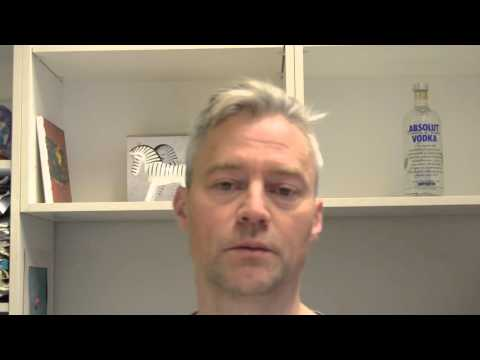

In [26]:
# Ole talks about clustering
YouTubeVideo("G7jYVrCVygU",width=600, height=338)

In this exercise we explore $K$-means clustering - and we it out on the locations of the `PROSTITUTION` crime type. Applying a clustering method makes sense because we know from our earlier work that this crime type tends to happen in only a few locations. We'll also talk a little bit about model selection and [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg) in unsupervised models.

> _Exercise_: $K$-means
> 
> * Visualize the prostitution data (e.g. by plotting it on a map)

In [27]:
import geoplotlib
import geoplotlib.utils

longitudes = SFPD_data[SFPD_data["Category"] == "PROSTITUTION"]["X"]
latitudes = SFPD_data[SFPD_data["Category"] == "PROSTITUTION"]["Y"]

longitudes = [x for x in longitudes if x != -120.5]
latitudes = [x for x in latitudes if x != 90]

geo_data_for_plotting = { "lat": latitudes, "lon": longitudes }
geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-04)
bbox = geoplotlib.utils.BoundingBox(north=max(latitudes), west=min(longitudes), south=min(latitudes), east=max(longitudes))

geoplotlib.set_bbox(bbox)
geoplotlib.inline()

('smallest non-zero count', 7.1647865443840454e-10)
('max count:', 10.918804735494032)


> * Train models of $K = 2,\ldots,10$ on the prostitution data.
> * Explore how the total squared error changes as a function of $K$ and identify what you think is the right number of clusers based on the knee-point in the squared error plot.
> * And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.


In [28]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = numpy.array([[x,y] for x,y in zip(latitudes,longitudes)])

errors = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(zip(latitudes, longitudes))
    labels = kmeans.labels_
    error = 0

    for num_cluster in numpy.unique(labels):
        cluster = X[labels == num_cluster]
        cluster_mean = numpy.mean(cluster, axis=0)
        error += sum(numpy.linalg.norm(x-cluster_mean)**2 for x in cluster)
    errors.append(error)

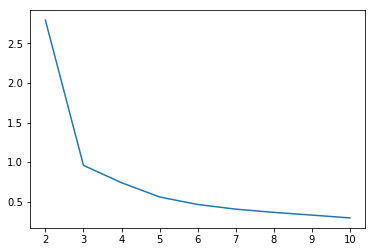

In [29]:
plt.plot(range(2,11), errors)
plt.show()

The right number of clusters seems to be 3 clusters (as can be seen in the knee)

The goal is to add the right number of clusters, not overfitting the problem as hell

> * Another way of estimating the right number of clusters in a $K$-means problem is _stability analysis_. The idea is the following
>   - For each $K = 2,\ldots,10$ generate $N = 10$ clusterings based on random 50% of data (or some other fraction of data/bootstrap).
>   - Divide the space up into an e.g. 20 by 20 grid, and give each gridpoint an index $i$ in the range 1-400. 
>   - Now represent each clustering as a vector $\mathbf{c}^K$, which where the $j$th entry $c_j^K$ is given by the number of centroids in that gridpoint. Most of the entries will be zero, and we have that $\sum_{j = 1}^{400} c_j^K = K$.
>   - We now define _stability_ for some value of $K$ as average pairwise similarity of the $N$ clusterings, where the similarity between clustering $i$ and $j$ is the cosine distance between clustering vectors $\mathbf{c}^K(i)$ and $\mathbf{c}^K(j)$.
>   - We now say that the right $K$ maximizes stability.
> * Explain why stability should help you find the right number of clusters.
> * **Optional**: Perform stability analysis on the prostitution data. 

A centroid is stable somewhere for a given $k$ if for the $N$ clusters, it always appears; it means that indeed there is a centroid at that point, even if the starting points are random. If we maximize the number of stabilized centroids, then we obtain a map where every centroid is "legit", thus helping us finding the right number of clusters.

In [31]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = numpy.array([[x,y] for x,y in zip(latitudes,longitudes)])

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(zip(latitudes, longitudes))
    labels = kmeans.labels_
    error = 0

    for num_cluster in numpy.unique(labels):
        cluster = X[labels == num_cluster]
        cluster_mean = numpy.mean(cluster, axis=0)
        error += sum(numpy.linalg.norm(x-cluster_mean)**2 for x in cluster)
    errors.append(error)

Part used to generate the .csv data files:

In [34]:
array = []

kmeans = KMeans(n_clusters=2, random_state = 0)
kmeans.fit(zip(latitudes, longitudes))
labels = kmeans.labels_

for i,(x,y) in enumerate(X):
    centroids = ""
    for a in kmeans.cluster_centers_:
        centroids += str(a[0]) + ")" + str(a[1]) + "]"

    array.append([centroids +'|', str(labels[i]) + '|', X[i][0], X[i][1]])

for k in range(3,7):
    kmeans = KMeans(n_clusters=k, random_state = 0)
    kmeans.fit(zip(latitudes, longitudes))
    labels = kmeans.labels_
    
    centroids = ""
    for a in kmeans.cluster_centers_:
        centroids += str(a[0]) + ")" + str(a[1]) + "]"
    
    for i,(_) in enumerate(X):
        array[i][0] += centroids + '|'
        array[i][1] += str(labels[i]) + '|'

In [41]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(zip(latitudes, longitudes))
kmeans.cluster_centers_

array([[  37.78765447, -122.41876998],
       [  37.76171021, -122.41599785],
       [  37.71917352, -122.46952143],
       [  37.78553069, -122.40453469],
       [  37.75868925, -122.48636573],
       [  37.72757762, -122.4054032 ]])

In [36]:
import csv

with open('charlie.csv', 'wb') as csvfile:
    charliewriter = csv.writer(csvfile, delimiter=',',
        quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for X in array:
        charliewriter.writerow(X)